In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
# %matplotlib inline

In [2]:
df=pd.read_csv("laptop_data.csv")
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1236,1236,HP,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg,117119.5632
1268,1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
345,345,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.4kg,60153.1200
237,237,Asus,Notebook,15.6,Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,2.2kg,30636.0000
932,932,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,1TB HDD,Intel HD Graphics 400,No OS,1.86kg,15392.5920


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.duplicated().sum()

29

In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1303 entries, 0 to 1302

Data columns (total 11 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1303 non-null   object 

 1   TypeName          1303 non-null   object 

 2   Inches            1303 non-null   float64

 3   ScreenResolution  1303 non-null   object 

 4   Cpu               1303 non-null   object 

 5   Ram               1303 non-null   object 

 6   Memory            1303 non-null   object 

 7   Gpu               1303 non-null   object 

 8   OpSys             1303 non-null   object 

 9   Weight            1303 non-null   object 

 10  Price             1303 non-null   float64

dtypes: float64(2), object(9)

memory usage: 112.1+ KB


In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1274 entries, 0 to 1273

Data columns (total 11 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1274 non-null   object 

 1   TypeName          1274 non-null   object 

 2   Inches            1274 non-null   float64

 3   ScreenResolution  1274 non-null   object 

 4   Cpu               1274 non-null   object 

 5   Ram               1274 non-null   object 

 6   Memory            1274 non-null   object 

 7   Gpu               1274 non-null   object 

 8   OpSys             1274 non-null   object 

 9   Weight            1274 non-null   object 

 10  Price             1274 non-null   float64

dtypes: float64(2), object(9)

memory usage: 119.4+ KB


In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<br/>
<h1 style="color:#800000">company</h1>
<br/>

In [13]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

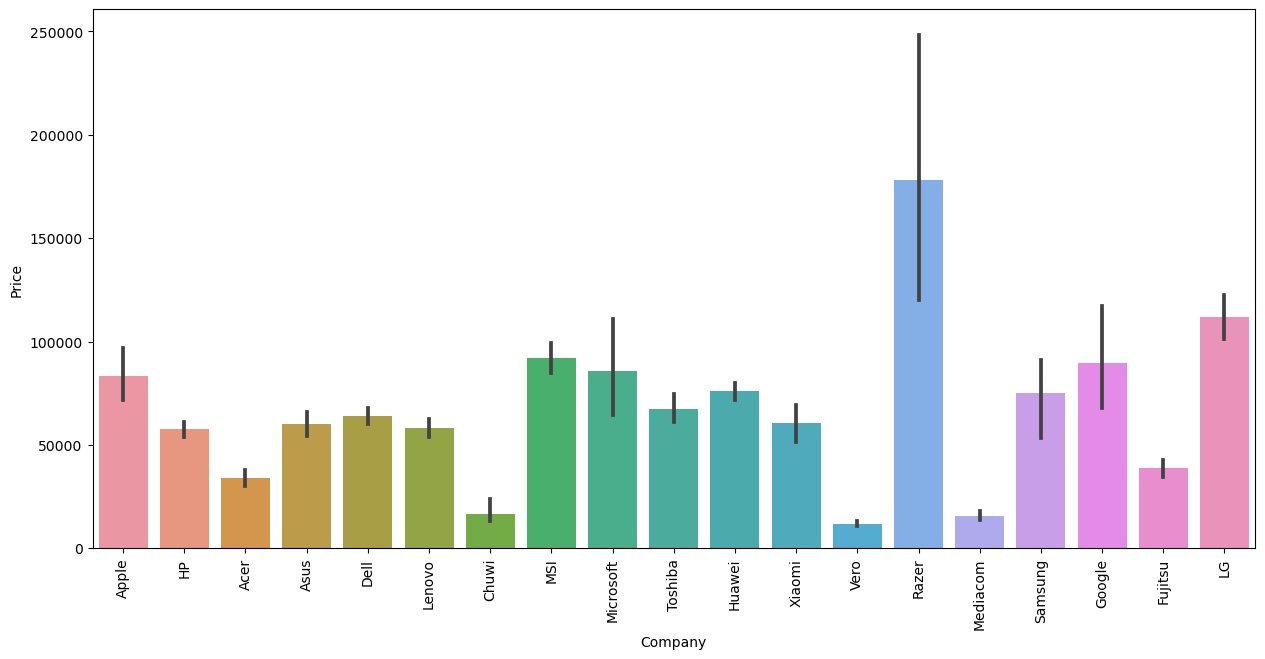

In [14]:
plt.rcParams["figure.figsize"] = (15,7)
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='count'>

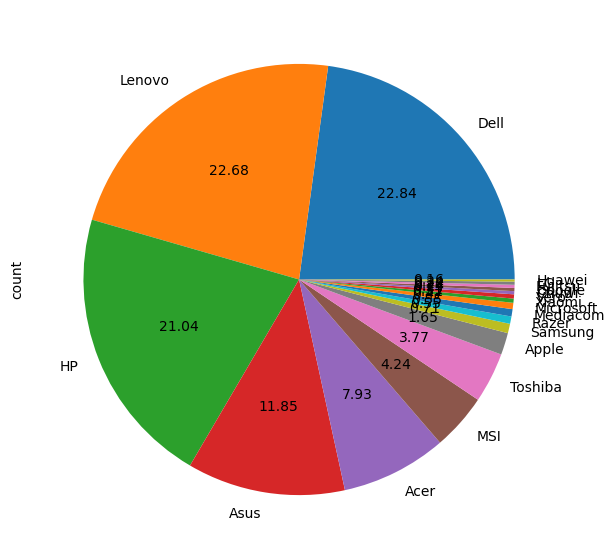

In [15]:
df['Company'].value_counts().plot(kind='pie',autopct='%.2f')

In [16]:
comp = df['Company'].value_counts()

replaceCompany = comp[comp<5].index
df['Company'] = df['Company'].replace(replaceCompany,'other')

In [17]:
replaceCompany

Index(['Xiaomi', 'Vero', 'Chuwi', 'Google', 'Fujitsu', 'LG', 'Huawei'], dtype='object', name='Company')

<AxesSubplot:ylabel='count'>

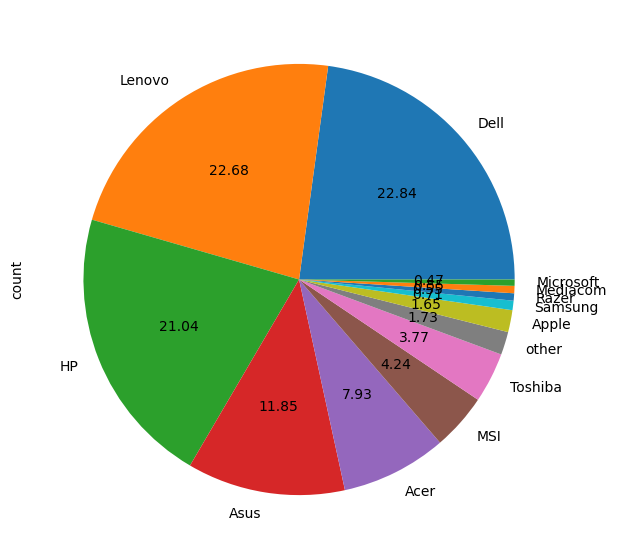

In [18]:
df['Company'].value_counts().plot(kind='pie',autopct='%.2f')

<br/>
<h1 style="color:#800000">TypeName</h1>
<br/>

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<AxesSubplot:ylabel='count'>

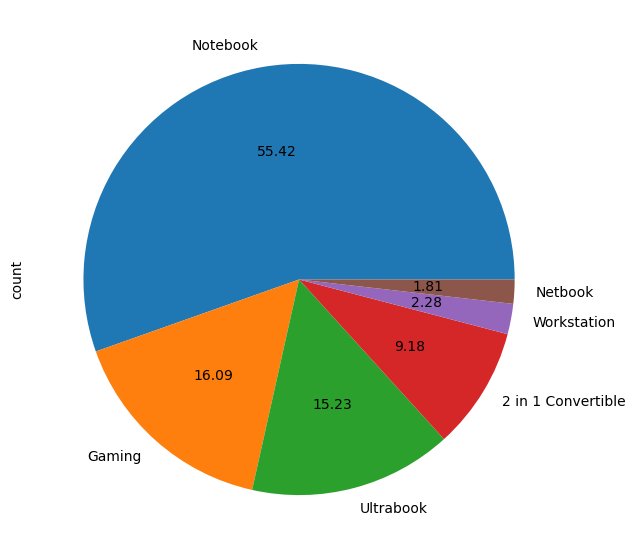

In [20]:
df['TypeName'].value_counts().plot(kind='pie',autopct='%.2f')

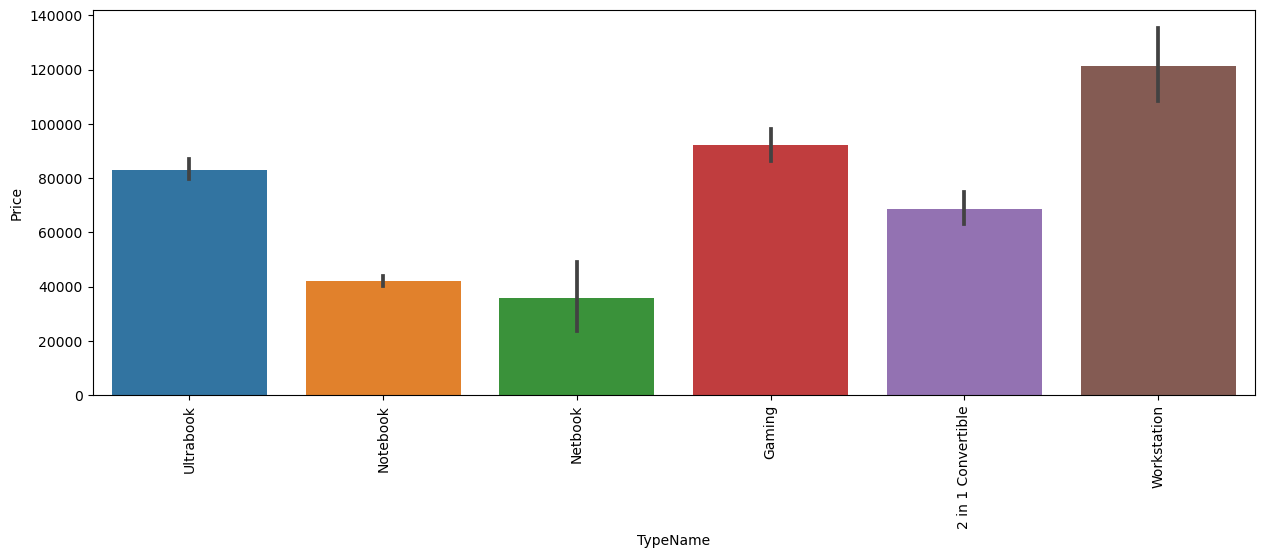

In [21]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='TypeName'>

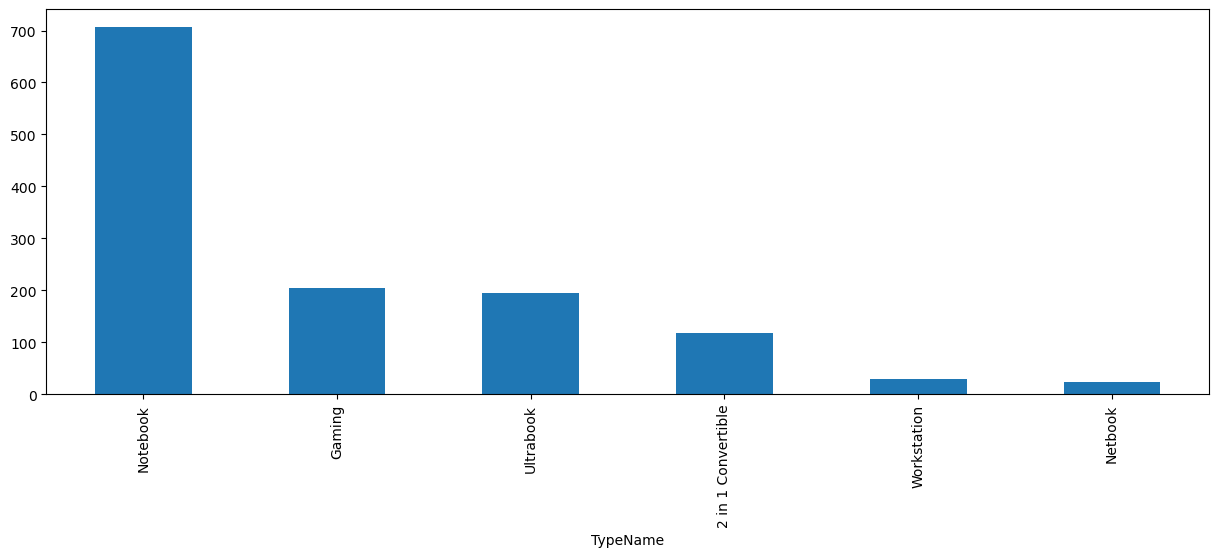

In [22]:
df['TypeName'].value_counts().plot(kind='bar')

<br/>
<h1 style="color:#800000">Inches</h1>
<br/>

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [24]:
df['Inches'].value_counts()

Inches
15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

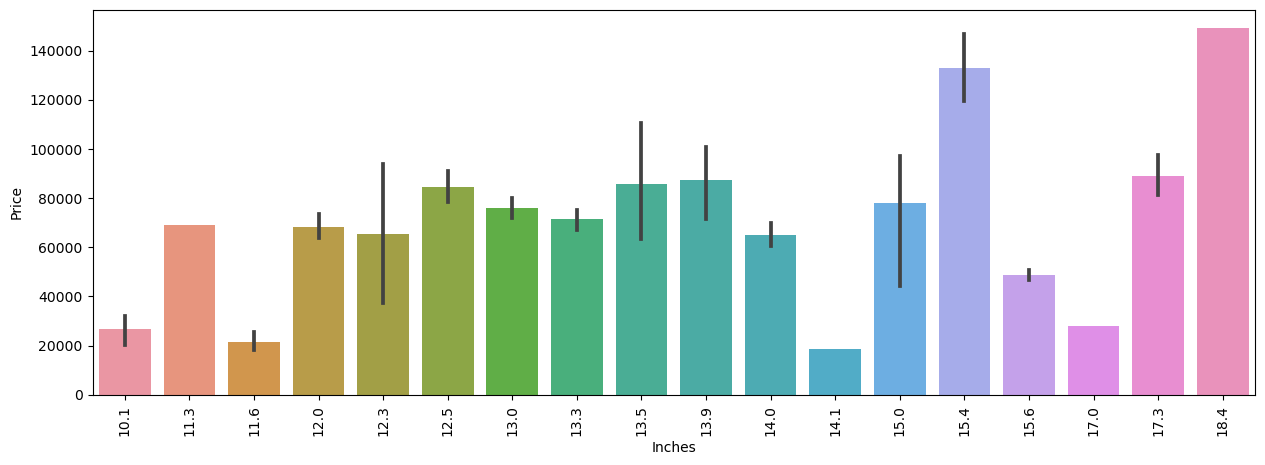

In [25]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Count'>

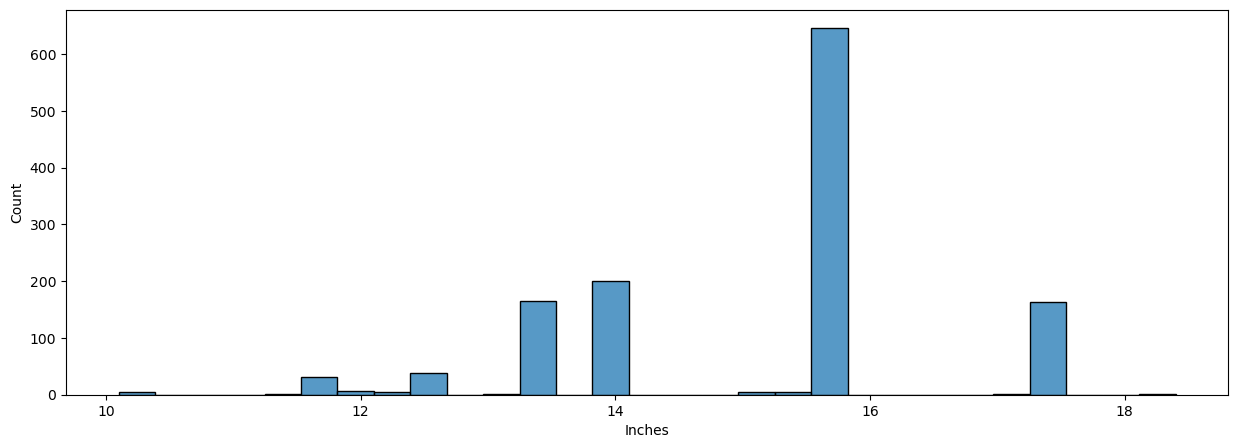

In [26]:
sns.histplot(df['Inches'])

<br/>
<h1 style="color:#800000">ScreenResolution</h1>
<br/>

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [28]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [29]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0


<AxesSubplot:xlabel='Touchscreen'>

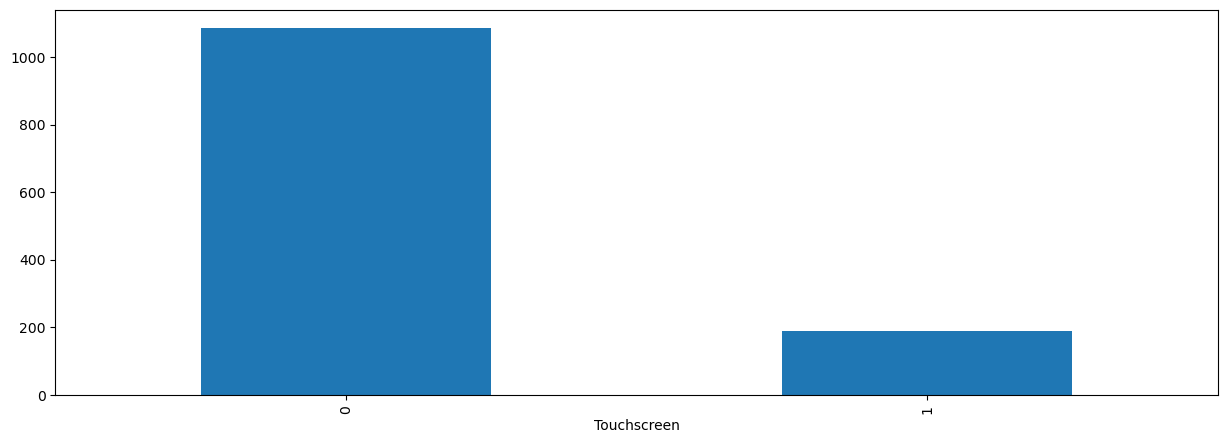

In [31]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips'>

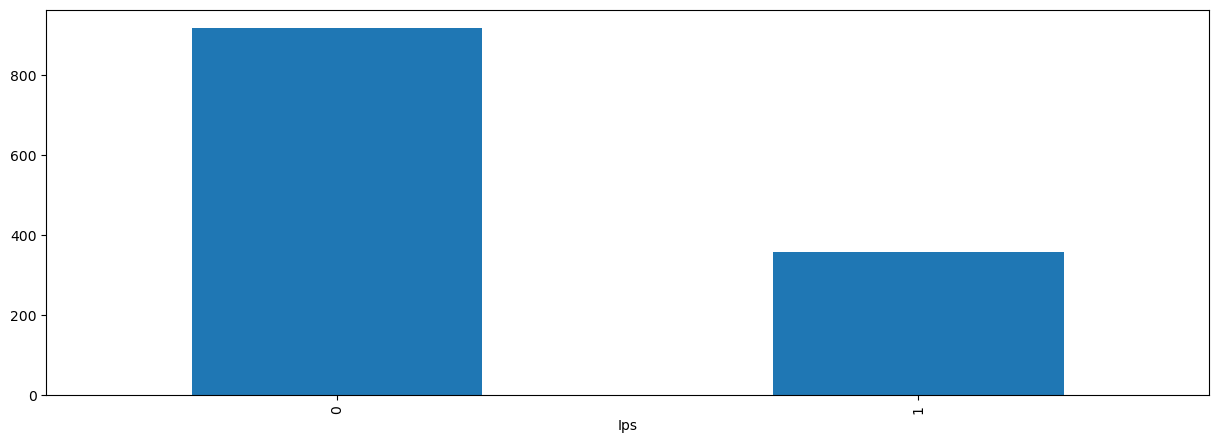

In [32]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

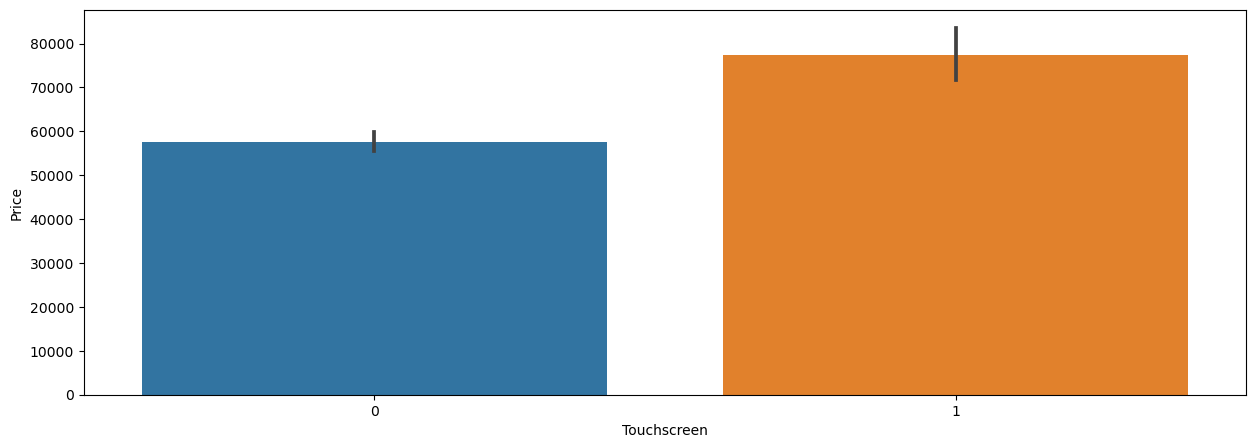

In [33]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<AxesSubplot:xlabel='Ips', ylabel='Price'>

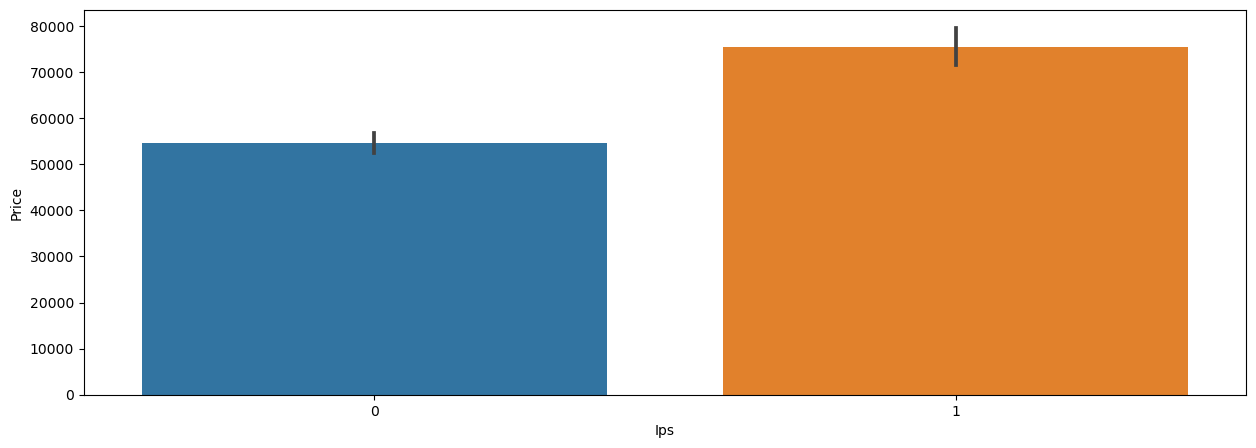

In [34]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [35]:
res = df['ScreenResolution'].apply(lambda x:x.split()[-1])
xRes=[]
yRes=[]
for i in res:
    xRes.append(int(i.split('x')[0]))
    yRes.append(int(i.split('x')[1]))

In [36]:
df['X_res']=xRes
df['Y_res']=yRes

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,2560,1600


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1274 entries, 0 to 1273

Data columns (total 15 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1274 non-null   object 

 1   TypeName          1274 non-null   object 

 2   Inches            1274 non-null   float64

 3   ScreenResolution  1274 non-null   object 

 4   Cpu               1274 non-null   object 

 5   Ram               1274 non-null   object 

 6   Memory            1274 non-null   object 

 7   Gpu               1274 non-null   object 

 8   OpSys             1274 non-null   object 

 9   Weight            1274 non-null   object 

 10  Price             1274 non-null   float64

 11  Ips               1274 non-null   int64  

 12  Touchscreen       1274 non-null   int64  

 13  X_res             1274 non-null   int64  

 14  Y_res             1274 non-null   int64  

dtypes: float64(2), int64(4), object(9)

memory usage: 159.2+ KB


In [39]:
df['ppi'] = (((df['X_res']**2)+(df['Y_res']**2))**0.5)/df['Inches']

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,2560,1600,226.983005


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1274 entries, 0 to 1273

Data columns (total 16 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1274 non-null   object 

 1   TypeName          1274 non-null   object 

 2   Inches            1274 non-null   float64

 3   ScreenResolution  1274 non-null   object 

 4   Cpu               1274 non-null   object 

 5   Ram               1274 non-null   object 

 6   Memory            1274 non-null   object 

 7   Gpu               1274 non-null   object 

 8   OpSys             1274 non-null   object 

 9   Weight            1274 non-null   object 

 10  Price             1274 non-null   float64

 11  Ips               1274 non-null   int64  

 12  Touchscreen       1274 non-null   int64  

 13  X_res             1274 non-null   int64  

 14  Y_res             1274 non-null   int64  

 15  ppi               1274 non-null   float64

dtypes: float64(3), int64(4), o

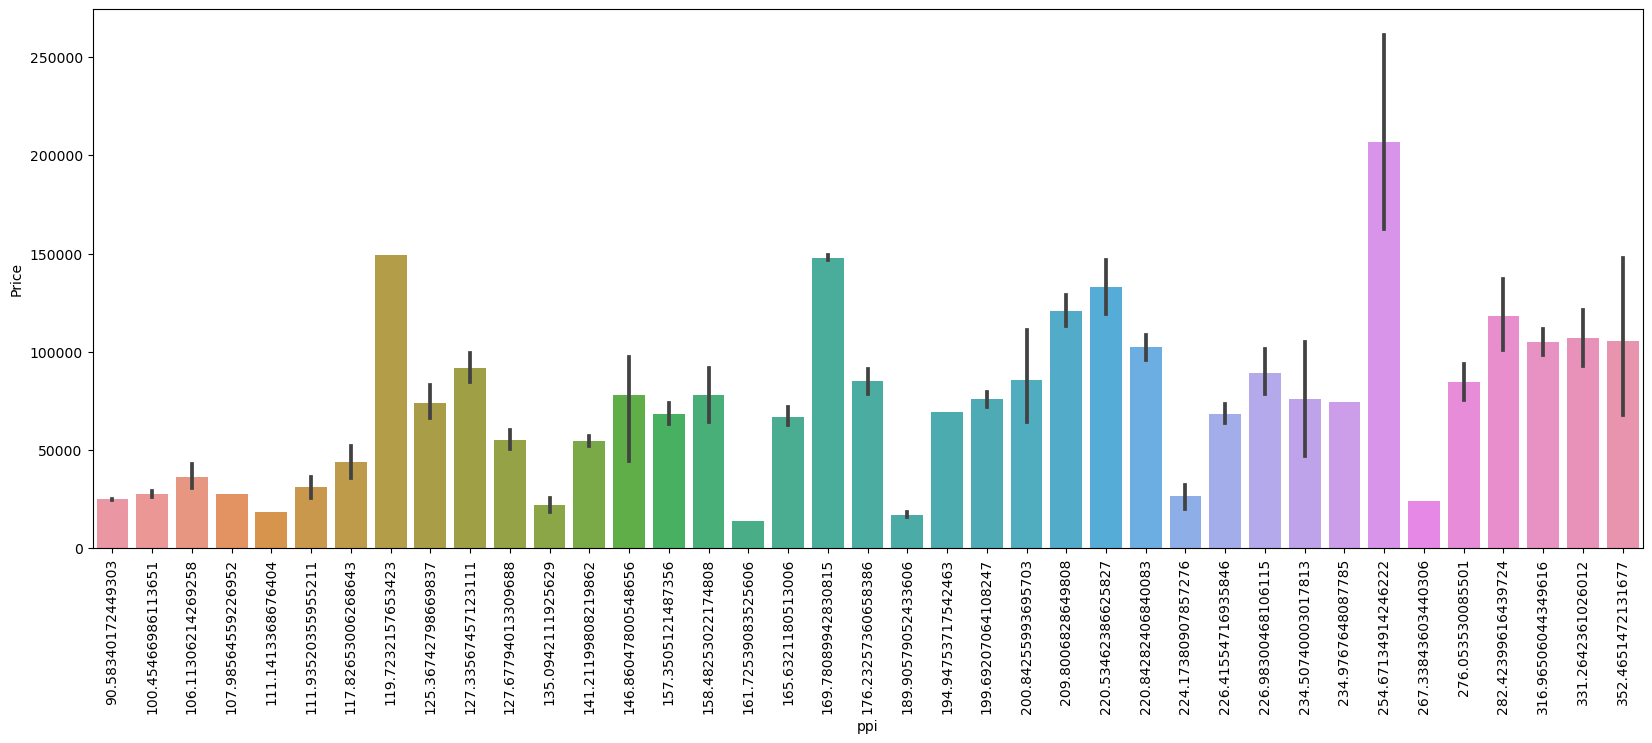

In [42]:
plt.rcParams["figure.figsize"] = (20,7)
sns.barplot(x=df['ppi'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='ppi'>

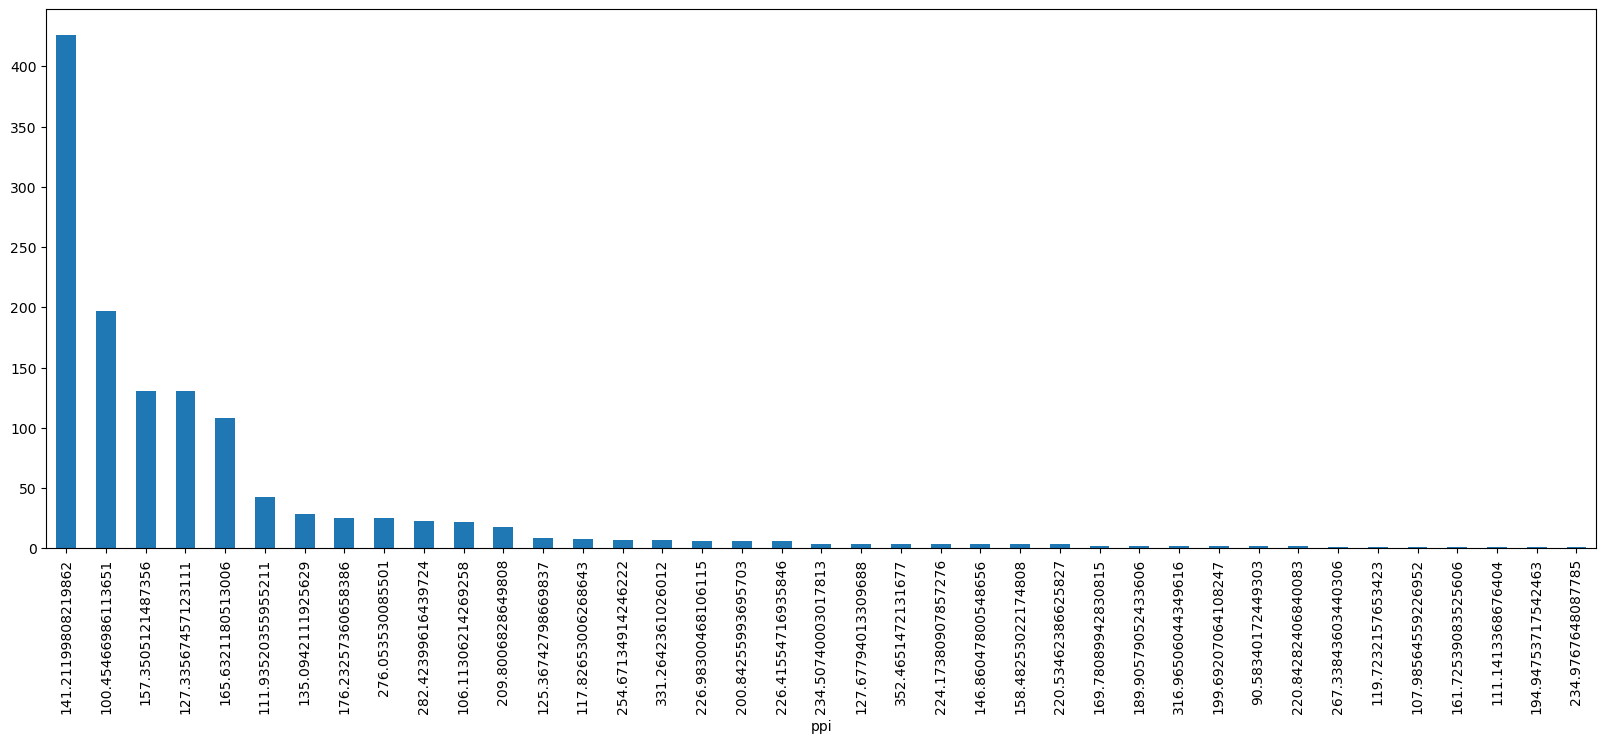

In [43]:
df['ppi'].value_counts().plot(kind='bar')

In [44]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res,ppi
915,Lenovo,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,46939.68,0,0,1920,1080,165.632118


In [45]:
df.drop(columns=['Inches','ScreenResolution','X_res','Y_res'],inplace=True)

<br/>
<h1 style="color:#800000">CPU</h1>
<br/>

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005


In [47]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [48]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,Intel Core i5


In [50]:
df['cpu_name'].value_counts()

cpu_name
Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1

In [51]:
df['Clock_speed'] = df['Cpu'].apply(lambda x:x.split()[-1])

In [52]:
df['Clock_speed'] = df['Clock_speed'].apply(lambda x:float(x.strip('GHz')))

In [53]:
df['Clock_speed'].value_counts()

Clock_speed
2.50    285
2.80    165
2.70    164
1.60    123
2.30     86
2.00     86
1.80     78
2.60     74
1.10     53
2.40     50
2.90     19
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: count, dtype: int64

In [54]:
def cpuBrand(txt):
    if(txt =='Intel Core i7' or txt == 'Intel Core i5' or txt == 'Intel Core i3' or txt == 'Intel Celeron Dual'):
        return txt
    elif 'Intel' in txt:
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [55]:
df['Cpu_brand'] = df['cpu_name'].apply(cpuBrand)

In [56]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,cpu_name,Clock_speed,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,Intel Core i5,2.3,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,1.8,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,2.5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,Intel Core i7,2.7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,Intel Core i5,3.1,Intel Core i5


<AxesSubplot:xlabel='Cpu_brand'>

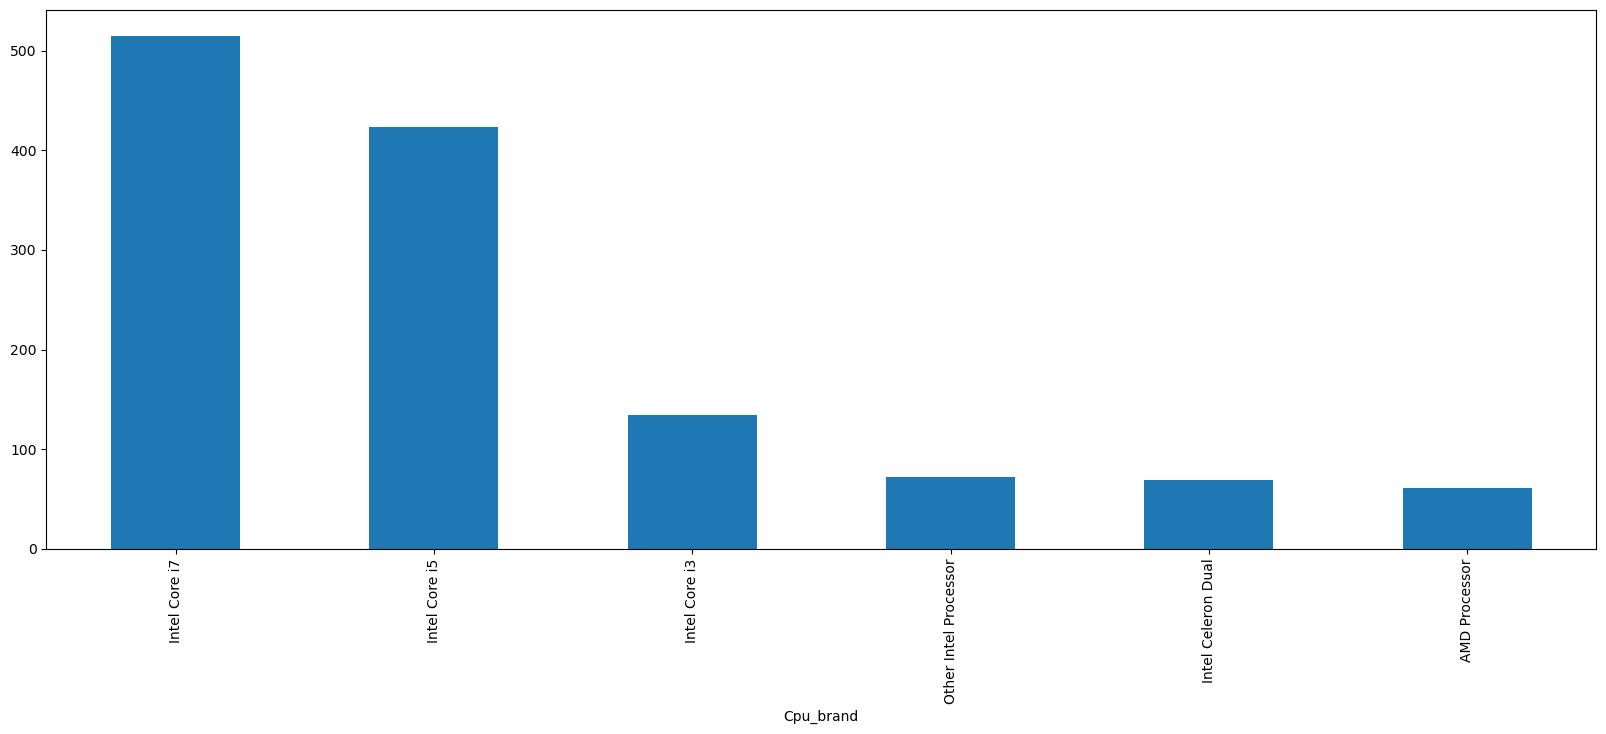

In [57]:
df['Cpu_brand'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cpu_brand', ylabel='Price'>

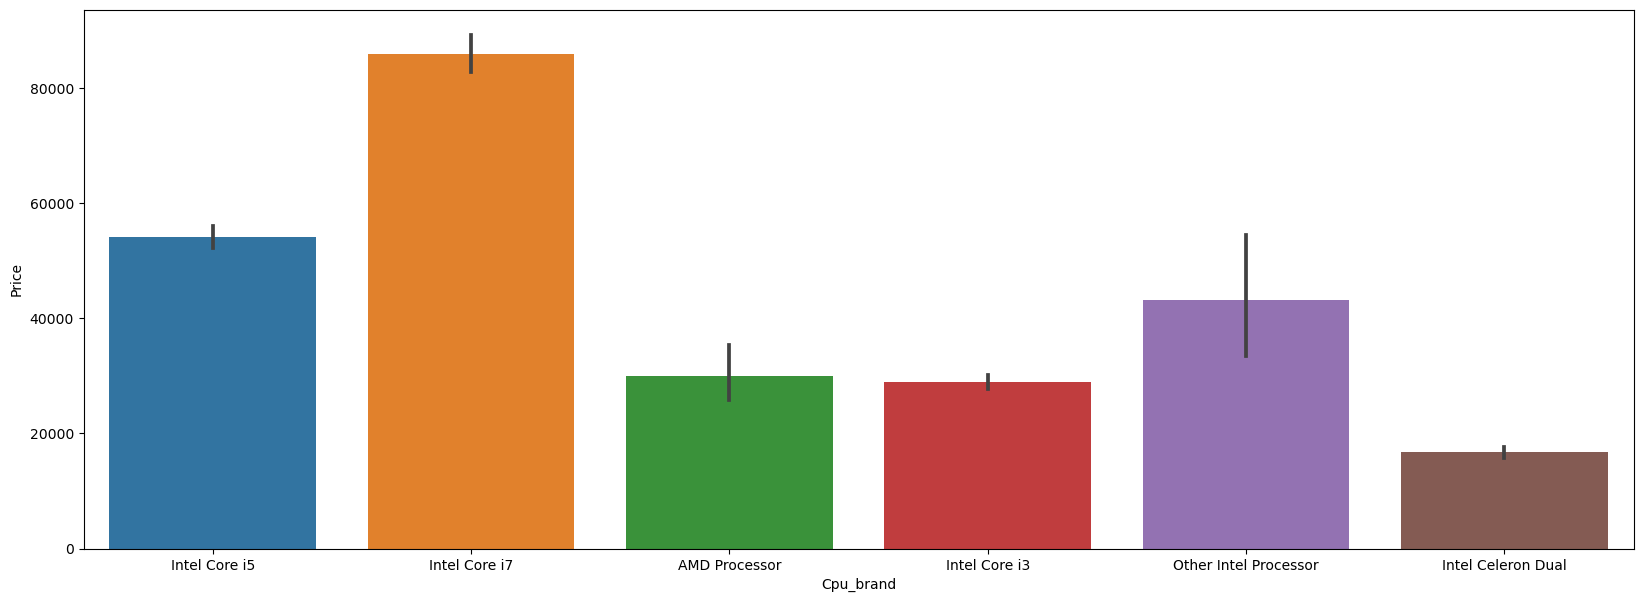

In [58]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])

<AxesSubplot:xlabel='Clock_speed', ylabel='Price'>

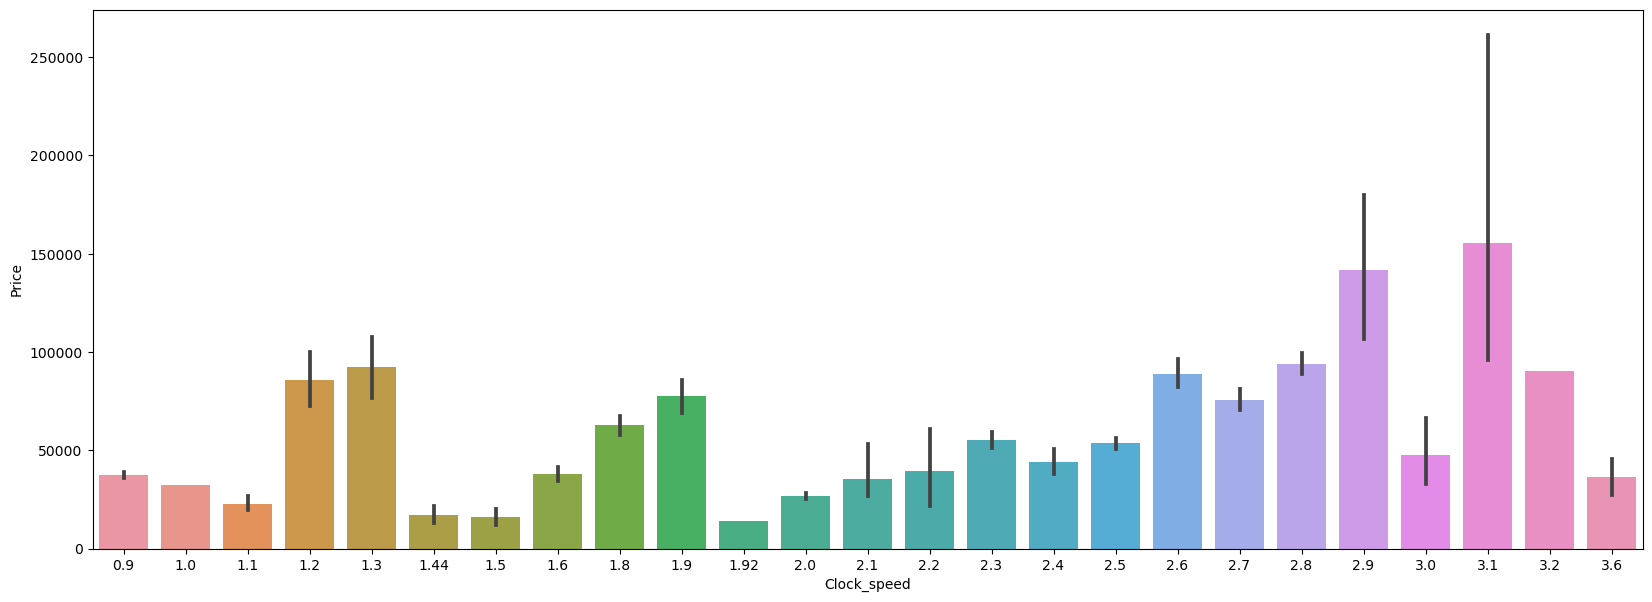

In [59]:
sns.barplot(x=df['Clock_speed'],y=df['Price'])

In [60]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,cpu_name,Clock_speed,Cpu_brand
1102,Acer,Notebook,Intel Celeron Dual Core 3205U 1.5GHz,4GB,16GB SSD,Intel HD Graphics,Chrome OS,2.20kg,11135.52,0,0,100.45467,Intel Celeron Dual,1.5,Intel Celeron Dual


In [61]:
df.drop(columns=['Cpu','cpu_name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1274 entries, 0 to 1273

Data columns (total 13 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   Company      1274 non-null   object 

 1   TypeName     1274 non-null   object 

 2   Ram          1274 non-null   object 

 3   Memory       1274 non-null   object 

 4   Gpu          1274 non-null   object 

 5   OpSys        1274 non-null   object 

 6   Weight       1274 non-null   object 

 7   Price        1274 non-null   float64

 8   Ips          1274 non-null   int64  

 9   Touchscreen  1274 non-null   int64  

 10  ppi          1274 non-null   float64

 11  Clock_speed  1274 non-null   float64

 12  Cpu_brand    1274 non-null   object 

dtypes: float64(3), int64(2), object(8)

memory usage: 139.3+ KB


<br/>
<h1 style="color:#800000">RAM</h1>
<br/>

In [63]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5


<AxesSubplot:ylabel='count'>

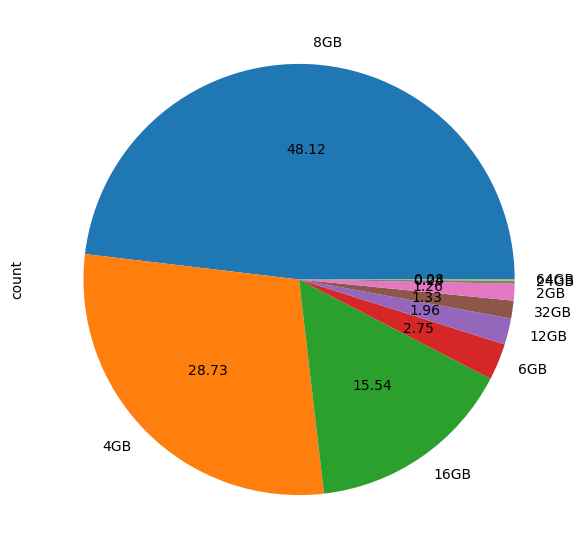

In [64]:
df['Ram'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='Ram'>

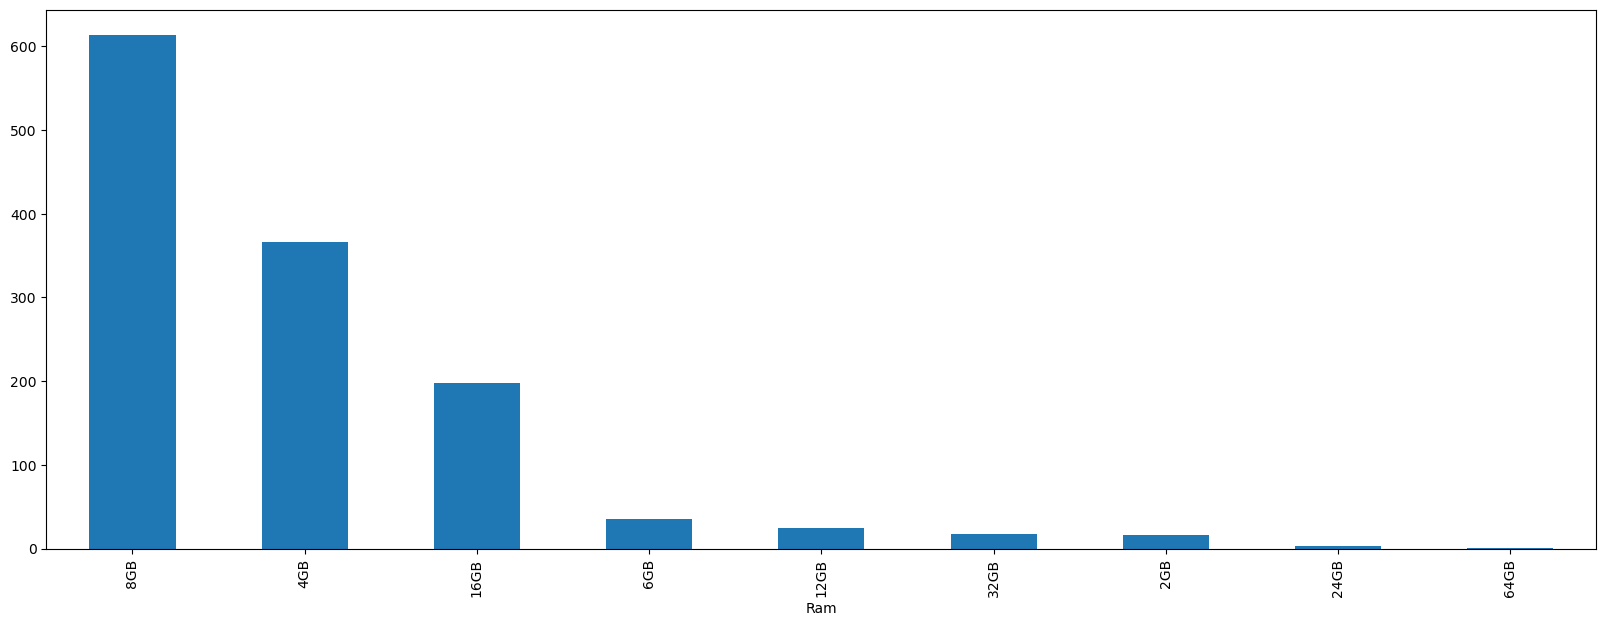

In [65]:
df['Ram'].value_counts().plot(kind='bar')

In [66]:
df['Ram'].value_counts()

Ram
8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

In [67]:
df['Ram'] = df['Ram'].apply(lambda x:int(x.strip("GB")))
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5


<AxesSubplot:xlabel='Ram', ylabel='Price'>

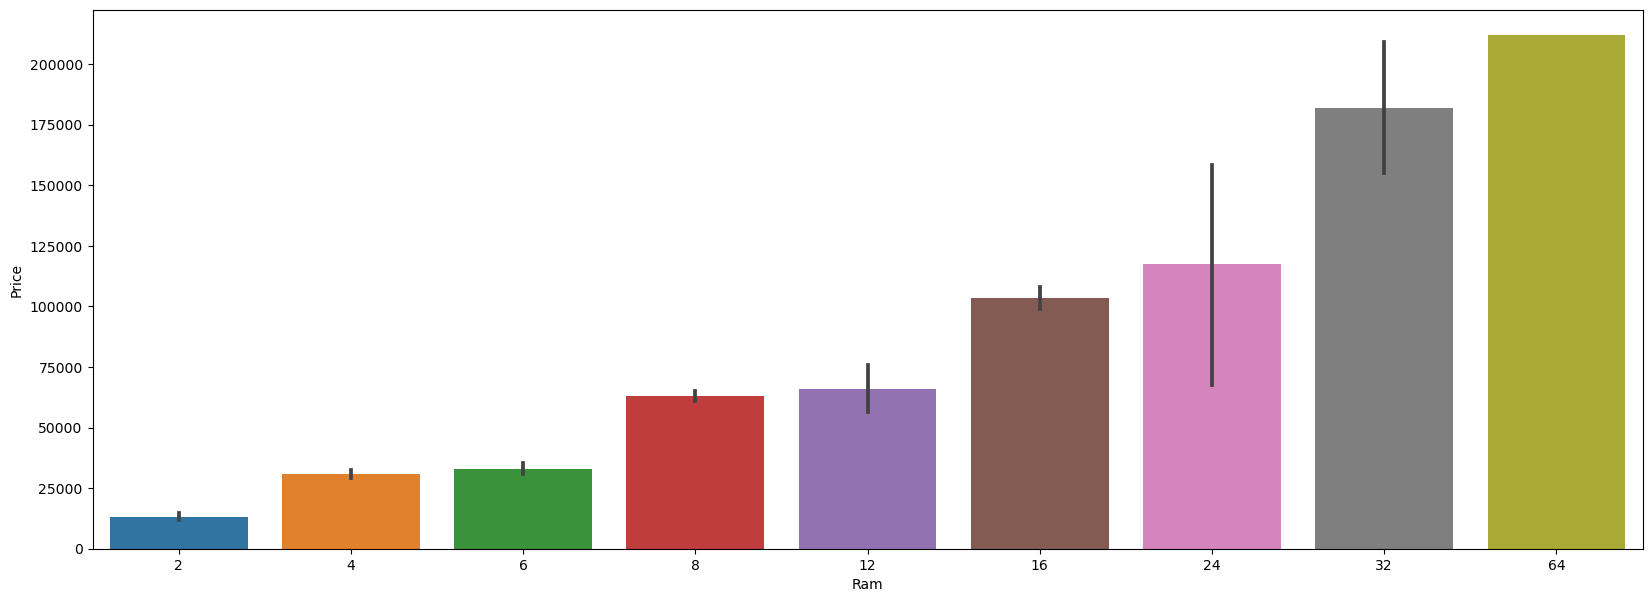

In [68]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1274 entries, 0 to 1273

Data columns (total 13 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   Company      1274 non-null   object 

 1   TypeName     1274 non-null   object 

 2   Ram          1274 non-null   int64  

 3   Memory       1274 non-null   object 

 4   Gpu          1274 non-null   object 

 5   OpSys        1274 non-null   object 

 6   Weight       1274 non-null   object 

 7   Price        1274 non-null   float64

 8   Ips          1274 non-null   int64  

 9   Touchscreen  1274 non-null   int64  

 10  ppi          1274 non-null   float64

 11  Clock_speed  1274 non-null   float64

 12  Cpu_brand    1274 non-null   object 

dtypes: float64(3), int64(3), object(7)

memory usage: 139.3+ KB


<br/>
<h1 style="color:#800000">RAM</h1>
<br/>

In [70]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5


In [71]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [72]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [73]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0


<AxesSubplot:xlabel='SSD', ylabel='Price'>

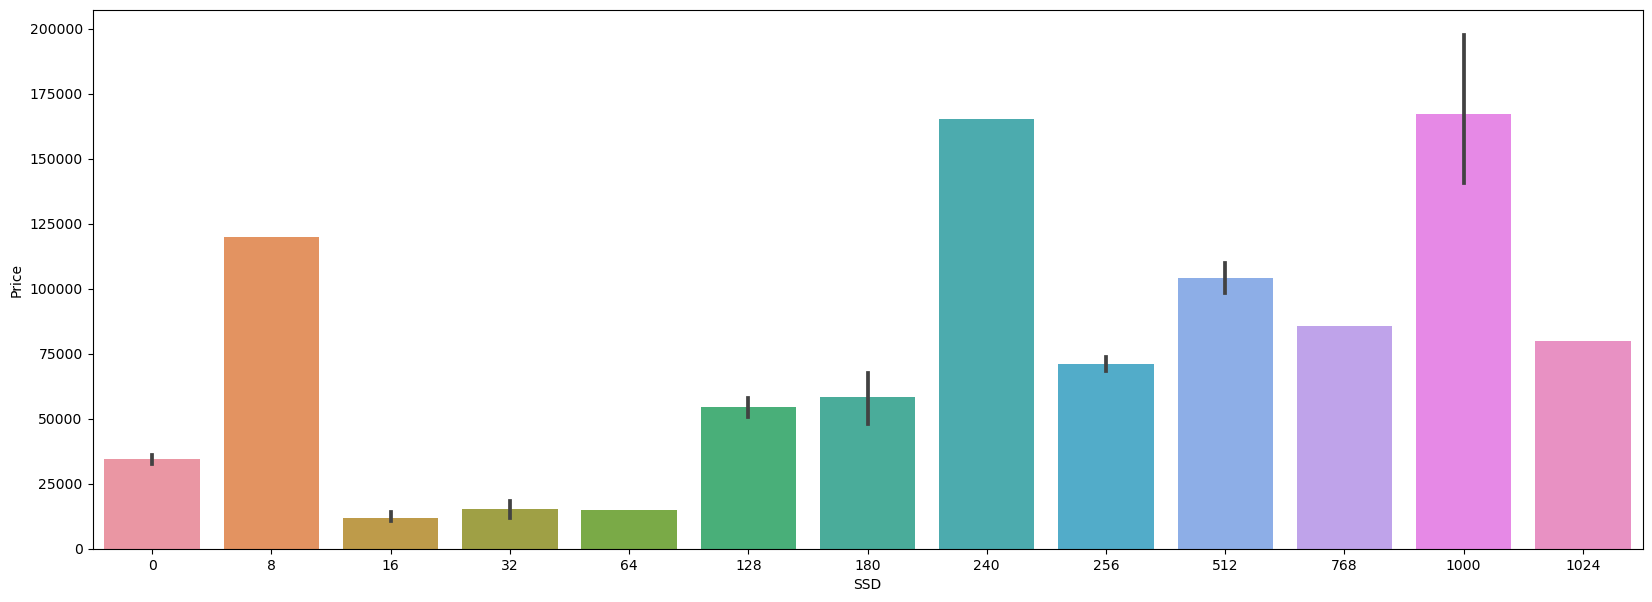

In [74]:
sns.barplot(x=df['SSD'],y=df['Price'])

<AxesSubplot:xlabel='Hybrid', ylabel='Price'>

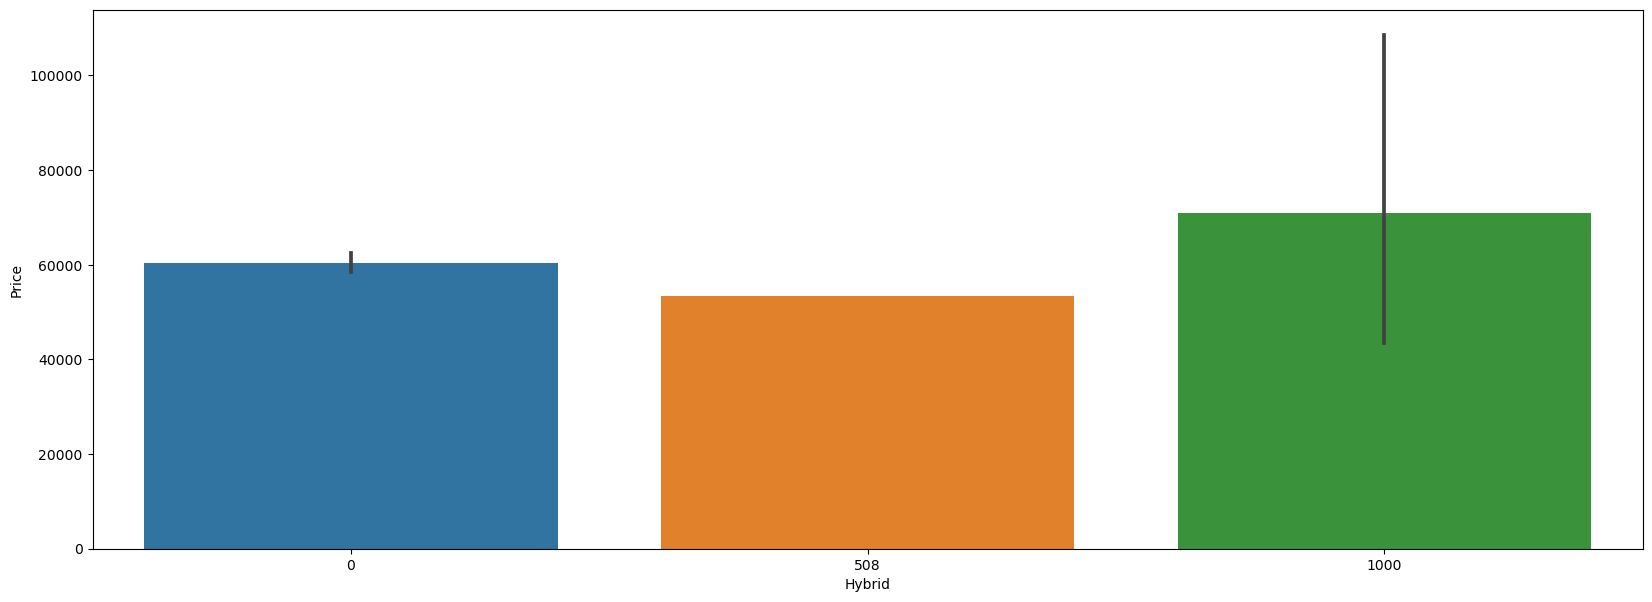

In [75]:
sns.barplot(x=df['Hybrid'],y=df['Price'])

<AxesSubplot:xlabel='Flash_Storage', ylabel='Price'>

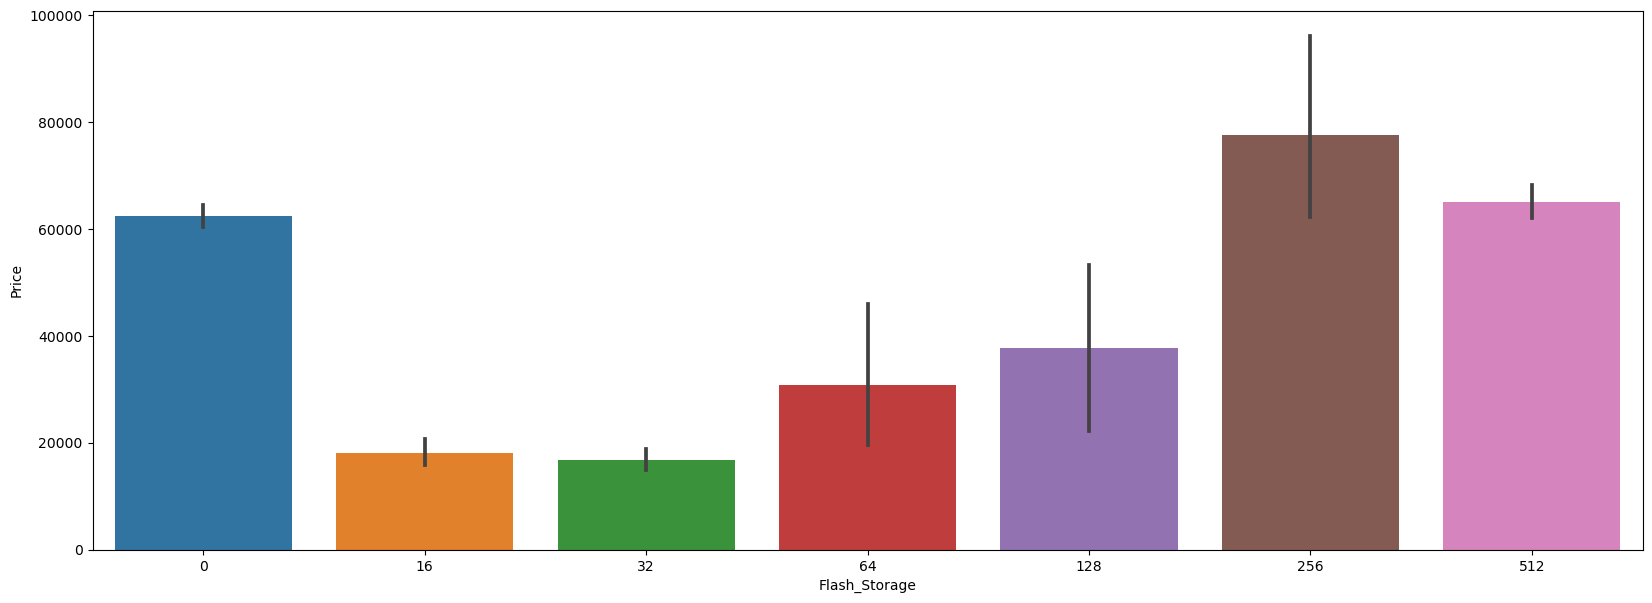

In [76]:
sns.barplot(x=df['Flash_Storage'],y=df['Price'])

In [77]:
df.drop(columns=['Memory'],inplace=True)

<br/>
<h1 style="color:#800000">Gpu</h1>
<br/>

In [78]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0


In [79]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [81]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [82]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [83]:
df = df[df['Gpu_brand'] != 'ARM']

In [85]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

<AxesSubplot:xlabel='Gpu_brand'>

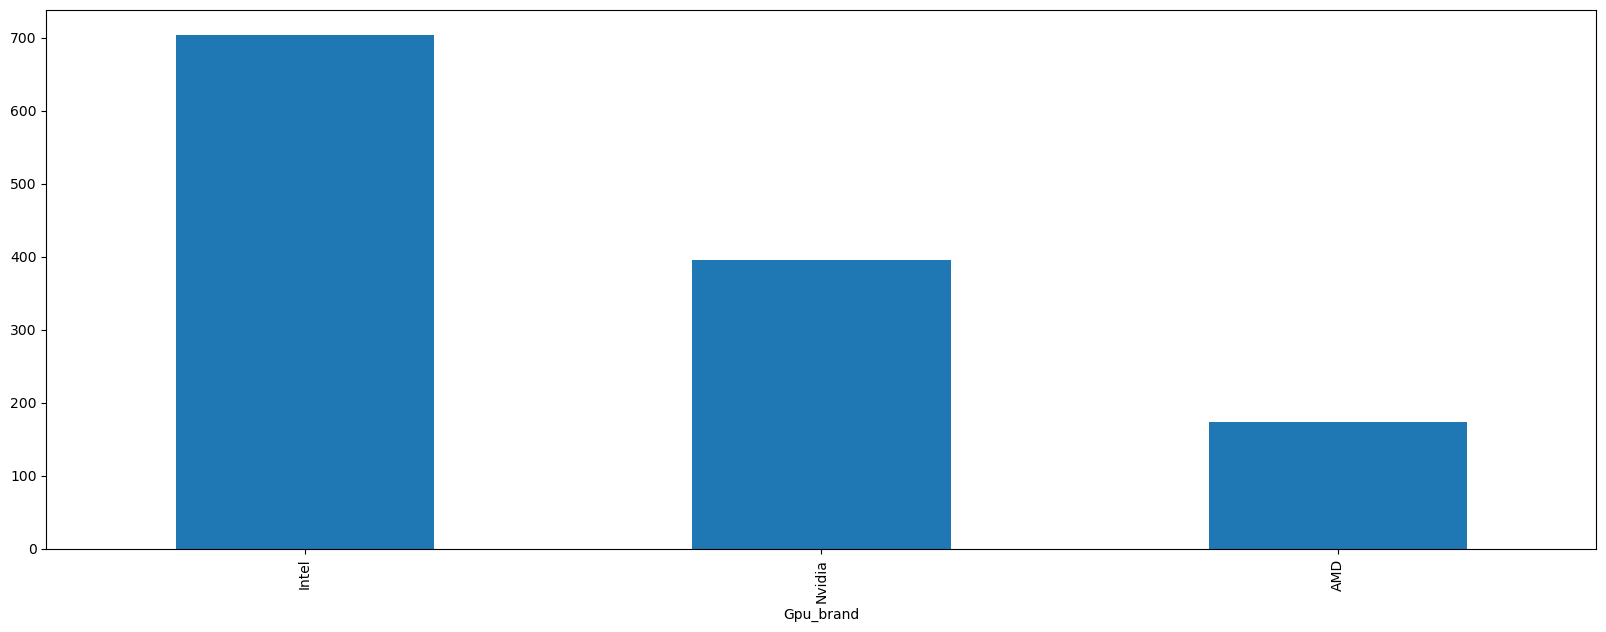

In [86]:
df['Gpu_brand'].value_counts().plot(kind='bar')

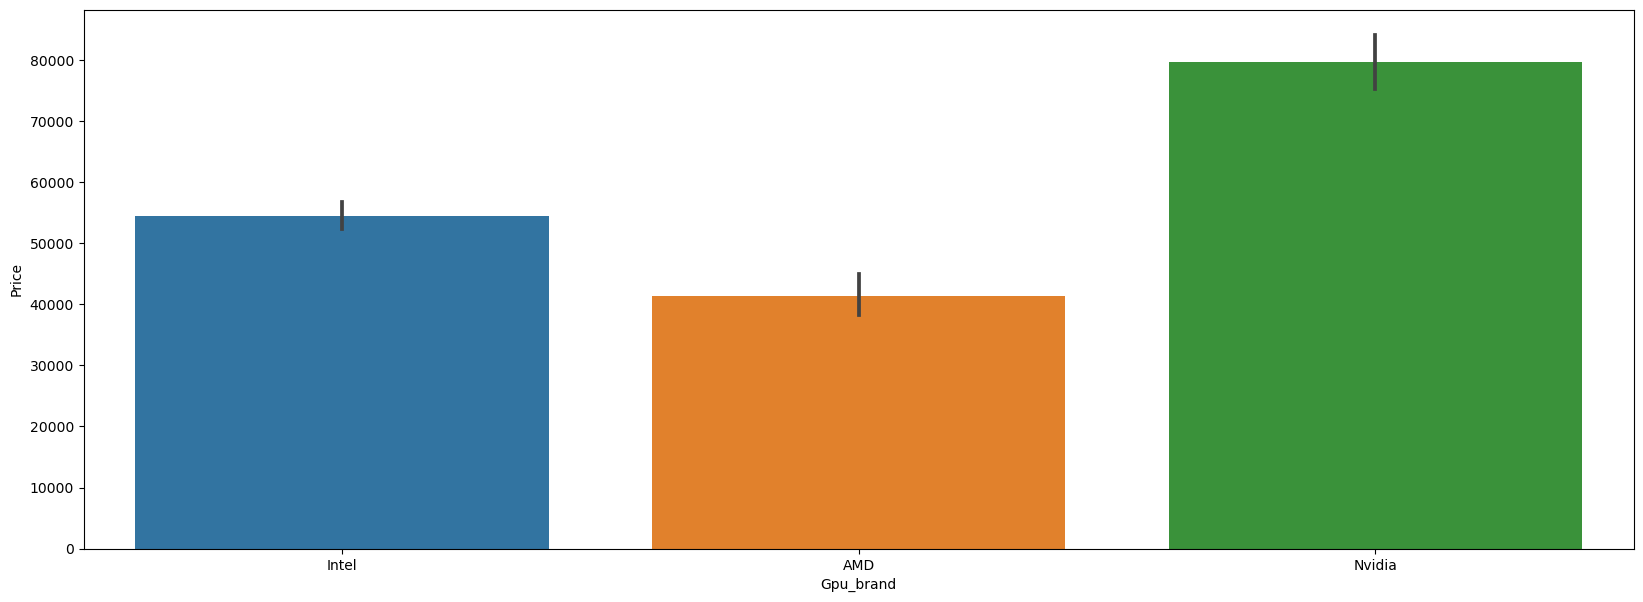

In [88]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.show()

In [89]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
69,Asus,Gaming,12,Nvidia GeForce GTX 1050 Ti,Linux,3kg,50562.72,0,0,127.335675,2.8,Intel Core i7,1000,0,0,0,Nvidia


In [90]:
df.drop(columns=['Gpu'],inplace=True)

<br/>
<h1 style="color:#800000">OpSys</h1>
<br/>

In [91]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0,Intel


In [92]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

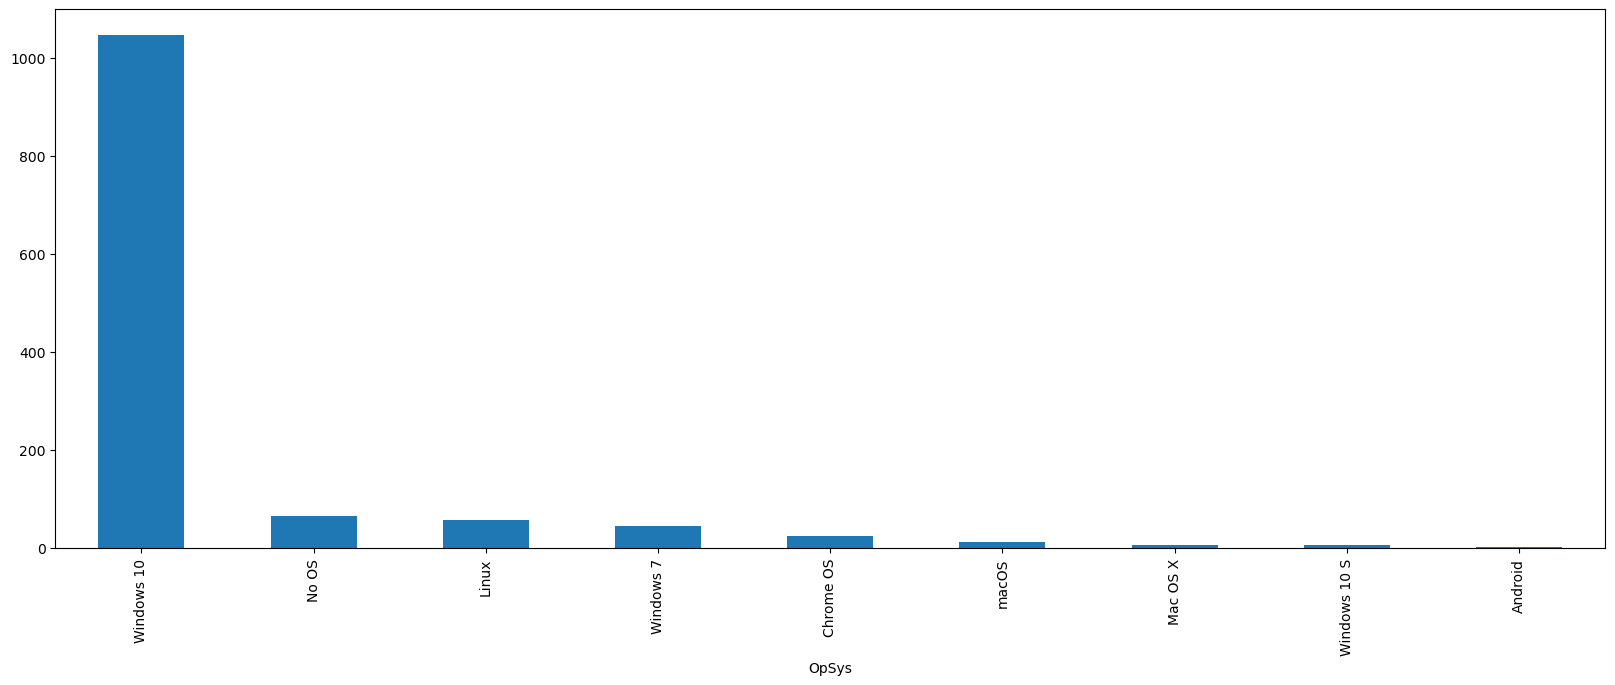

In [95]:
df['OpSys'].value_counts().plot(kind='bar')
plt.show()

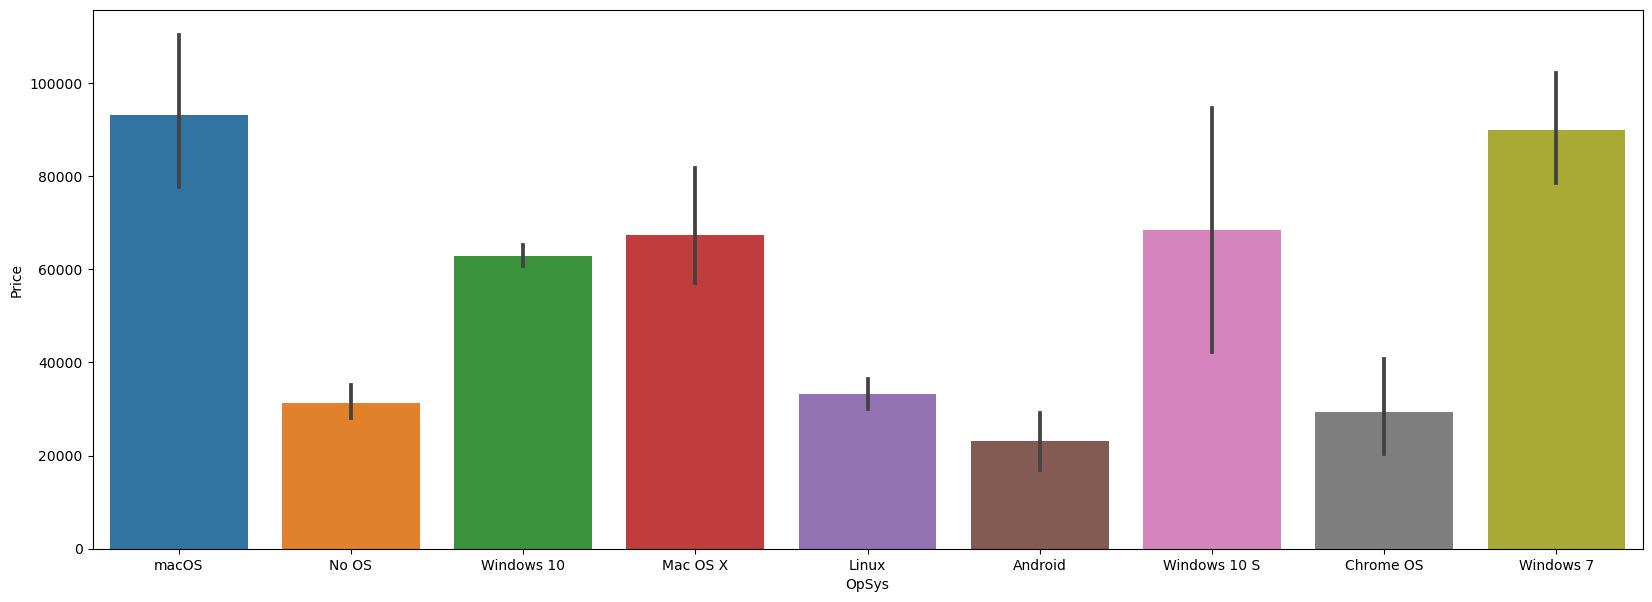

In [93]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.show()

In [96]:
def operatingSystem(txt):
    if(txt == 'Windows 10' or txt == 'Windows 7' or txt == 'Windows 10 S'):
        return 'Windows'
    elif(txt == 'macOS' or txt == 'Mac OS X'):
        return 'Mac'
    else:
        return 'Other'

In [97]:
df['OpSys'] = df['OpSys'].apply(operatingSystem)

In [98]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Other,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0,Intel


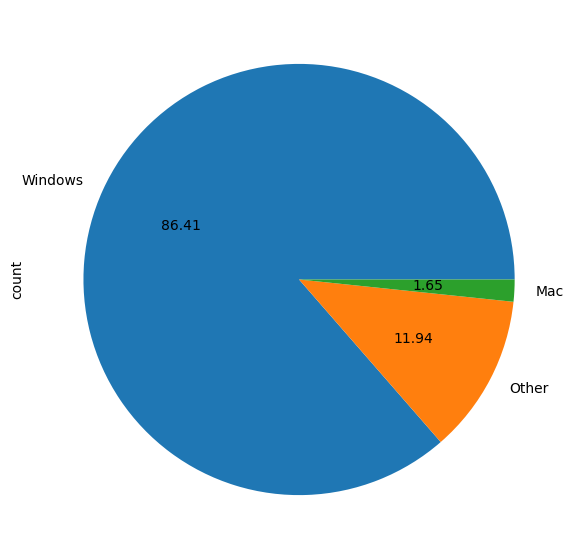

In [101]:
df['OpSys'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

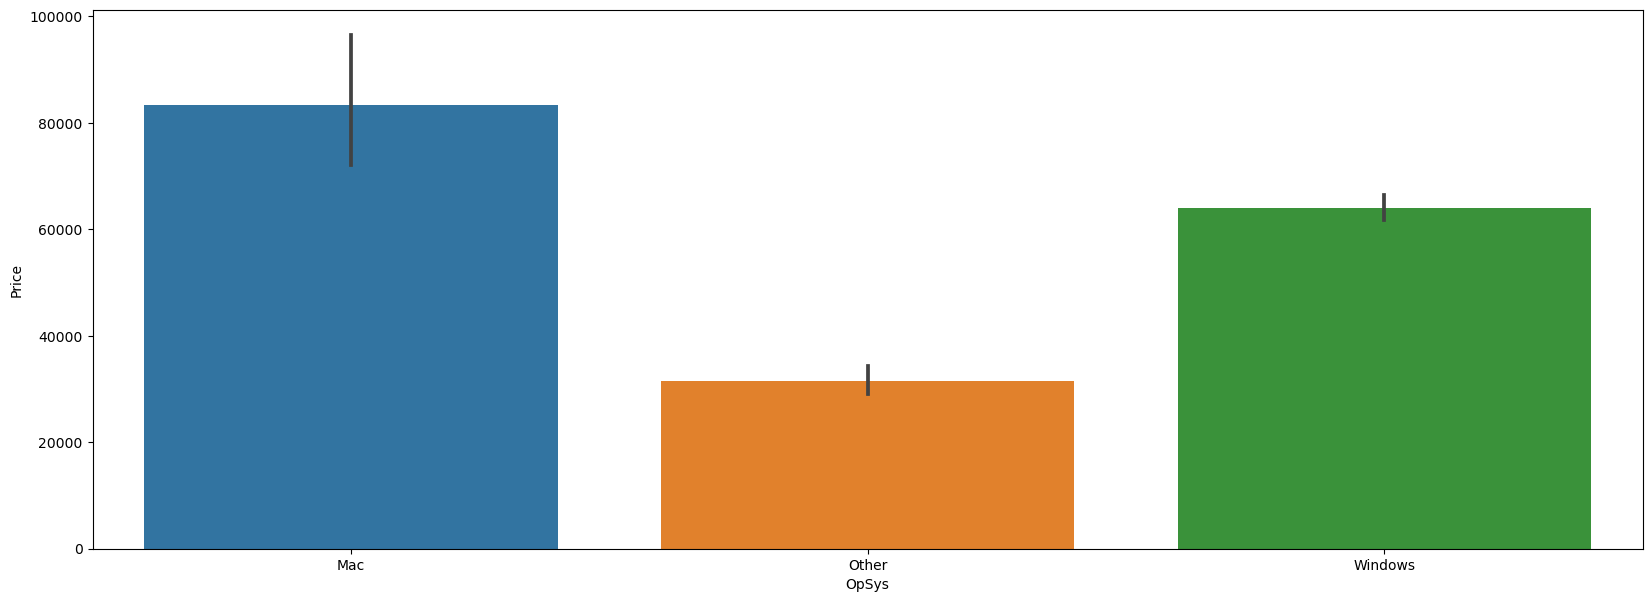

In [102]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.show()

<br/>
<h1 style="color:#800000">Weight</h1>
<br/>

In [103]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37kg,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34kg,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Other,1.86kg,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83kg,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37kg,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0,Intel


In [104]:
df['Weight'].value_counts()

Weight
2.2kg     116
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      37
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [113]:
df['Weight']=df['Weight'].apply(lambda x:float(x.strip("kg")))

In [114]:
df['Weight'].value_counts()

Weight
2.20    119
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: count, Length: 171, dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Price'>

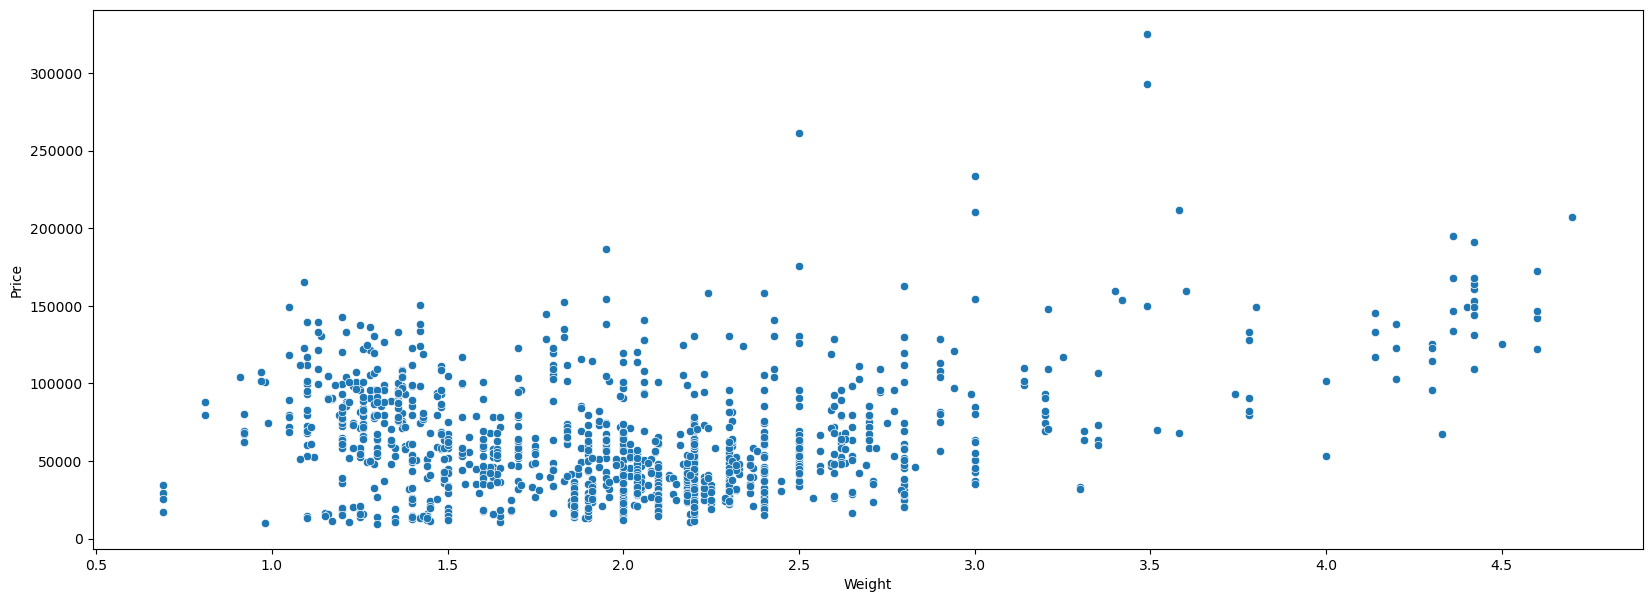

In [116]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

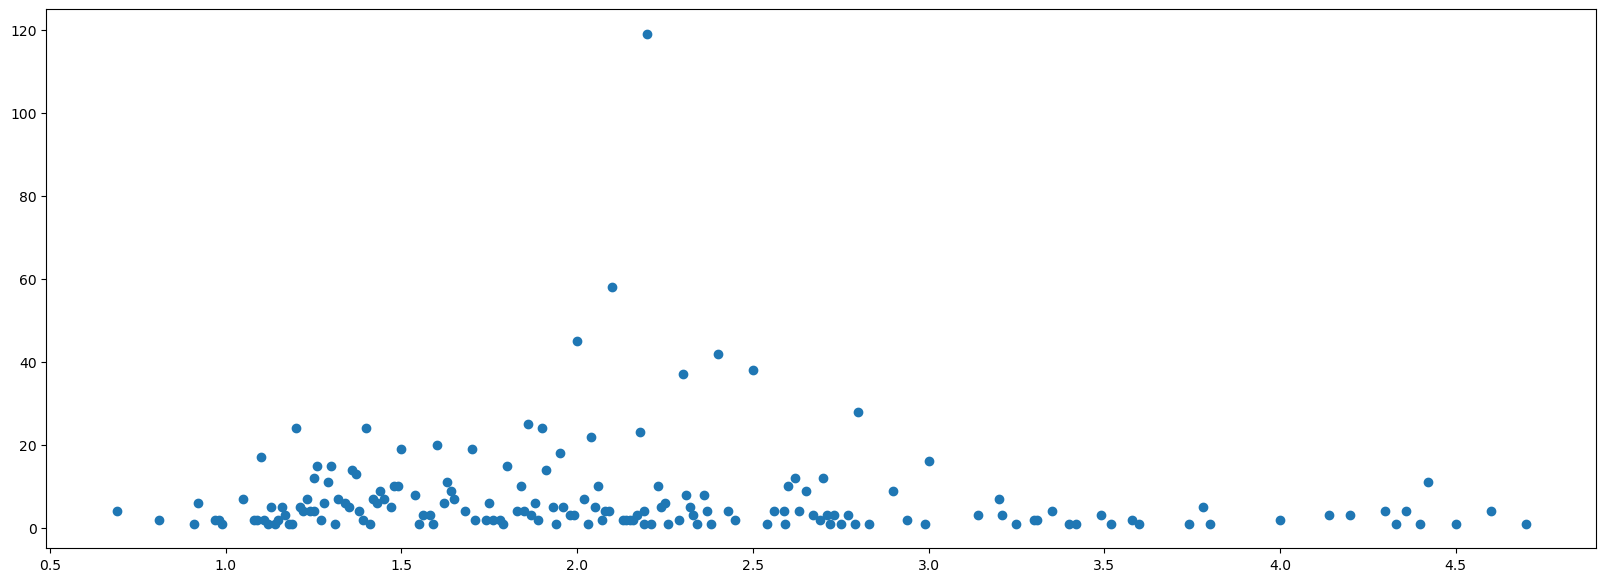

In [122]:
plt.scatter(df['Weight'].value_counts().index,df['Weight'].value_counts().values)

<br/>
<h1 style="color:#800000">Final Step</h1>
<br/>

In [123]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,2.5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,1,0,220.534624,2.7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,1,0,226.983005,3.1,Intel Core i5,0,256,0,0,Intel


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1273 entries, 0 to 1273

Data columns (total 16 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Company        1273 non-null   object 

 1   TypeName       1273 non-null   object 

 2   Ram            1273 non-null   int64  

 3   OpSys          1273 non-null   object 

 4   Weight         1273 non-null   float64

 5   Price          1273 non-null   float64

 6   Ips            1273 non-null   int64  

 7   Touchscreen    1273 non-null   int64  

 8   ppi            1273 non-null   float64

 9   Clock_speed    1273 non-null   float64

 10  Cpu_brand      1273 non-null   object 

 11  HDD            1273 non-null   int64  

 12  SSD            1273 non-null   int64  

 13  Hybrid         1273 non-null   int64  

 14  Flash_Storage  1273 non-null   int64  

 15  Gpu_brand      1273 non-null   object 

dtypes: float64(4), int64(7), object(5)

memory usage: 169.1+ KB


In [126]:
df.select_dtypes(include=['int64', 'float64']).corrwith(df['Price'])

Ram              0.739996
Weight           0.211667
Price            1.000000
Ips              0.251514
Touchscreen      0.190382
ppi              0.471481
Clock_speed      0.427994
HDD             -0.098481
SSD              0.669808
Hybrid           0.022490
Flash_Storage   -0.036712
dtype: float64

<br/>
<h1 style="color:#800000">Training & Testing</h1>
<br/>

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [199]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [138]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Clock_speed,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,1,0,226.983005,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,0,128,Intel


In [189]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [190]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=199)

In [191]:
xtrain.shape,xtest.shape

((1018, 15), (255, 15))

In [192]:
ytrain.shape,ytest.shape

((1018,), (255,))

<br/>
<br/>

<h1 style="color: rgb(109, 79, 0)">LinearRegression</h1>

In [207]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_brand'])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.8660558134549821

MAE 0.18085649796853762


<h1 style="color: rgb(109, 79, 0)">Lasso</h1>

In [208]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_brand'])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.8641009399170432

MAE 0.18263686515259672


<h1 style="color: rgb(109, 79, 0)">RandomForestRegressor</h1>

In [258]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_brand'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=2,
                              max_samples=1.0,
                              max_features=0.45,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9238437101148905

MAE 0.13462911194832264


<h1 style="color: rgb(109, 79, 0)">GradientBoostingRegressor</h1>

In [253]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_brand'])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=1000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9198449522534005

MAE 0.13428714391417484


<h1 style="color: rgb(109, 79, 0)">DecisionTreeRegressor</h1>

In [217]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_brand'])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.8575962832660493

MAE 0.18184468212436095


In [259]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))